# Covid Variants Analysis and Forecasting

## Data Analysis

In [3]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import random

### Load in the data

Load data and display the first 5 rows.

In [4]:
df = pd.read_csv('./covid-variants.csv', index_col='date', infer_datetime_format = True)
df.head(5)

,location,variant,num_sequences,perc_sequences,num_sequences_total
date,,,,,
2020-07-06,Angola,Alpha,0,0.0,3
2020-07-06,Angola,B.1.1.277,0,0.0,3
2020-07-06,Angola,B.1.1.302,0,0.0,3
2020-07-06,Angola,B.1.1.519,0,0.0,3
2020-07-06,Angola,B.1.160,0,0.0,3


Get a summary of the dataset by using pandas_profiling library.

In [5]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Observations from the data report:**
1. Data is clean. There's no missing data.
2. The data includes the number of cases for 24 different covid variants in 121 locations.
3. There are in total 45 dates in which the data is recorded (need to check if those date are evenly separated).

### Understand the data via data visualisation

**Display the total number of cases over all included countries for each variant.**

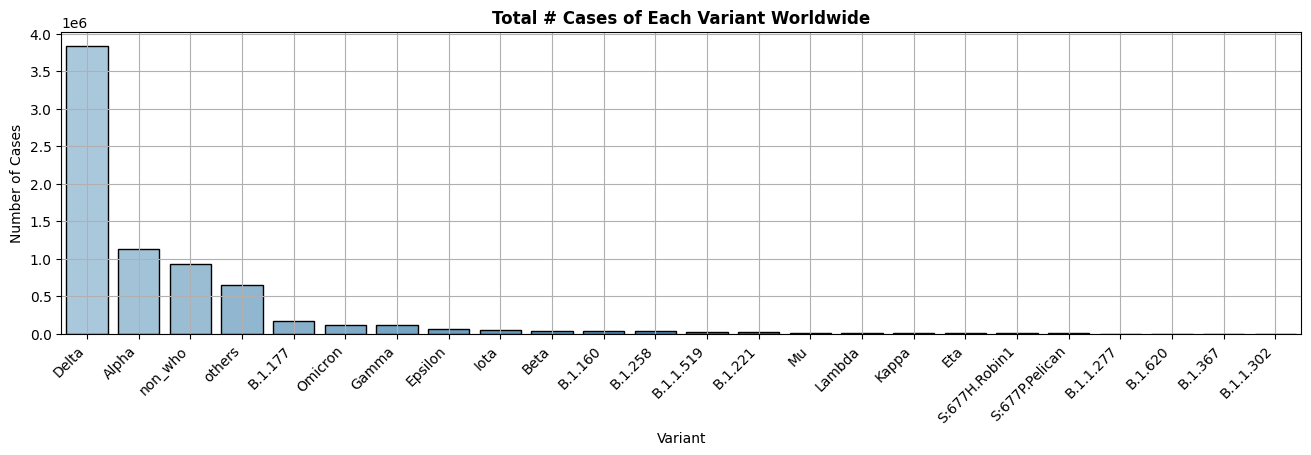

In [6]:
dataframe = df.groupby('variant')['num_sequences'].agg('sum').sort_values(ascending = False)
dataframe = pd.DataFrame({'Variant': dataframe.index, 'Number of Cases': dataframe.values})
fig = plt.figure(figsize = (16,4), dpi = 100)
sns.barplot(x = dataframe['Variant'], y = dataframe["Number of Cases"], edgecolor = 'black', linewidth = 1, palette = "Blues_d")
plt.xticks(rotation=45, ha="right")
plt.title(f'Total # Cases of Each Variant Worldwide', loc = 'center', fontweight = "bold")
plt.grid()
plt.show()

**Better display the percentages of the total cases of each variant in a pie chart.**

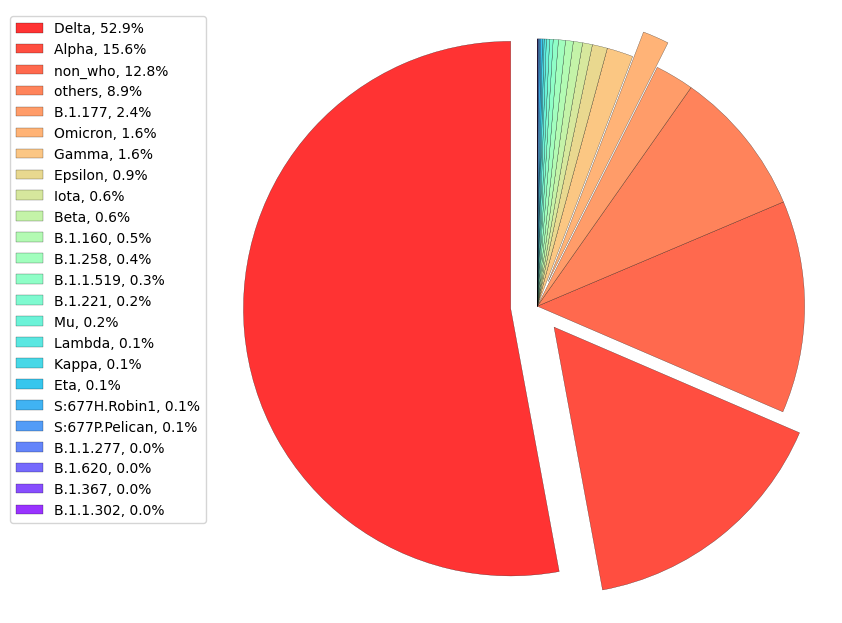

In [7]:
s1 = df.groupby('variant')['num_sequences'].agg('sum').sort_values(ascending = False)
labels = s1.index
sizes = s1.values
explode = tuple(1000 if labels[i] in ['Alpha', 'Delta', 'Omicron'] else 0 for i in range(len(labels)))
colors = cm.rainbow((np.linspace(1, 0, len(labels))))


fig = plt.figure(figsize = (8, 8), dpi = 100)
plt.pie(sizes, explode = explode, radius = 10000, labels = None, shadow = False, startangle = 90, colors = colors, wedgeprops = {'alpha': 0.8, 'edgecolor': 'black', 'linewidth': 0.2, 'linestyle': '-'})
plt.axis('equal') # Circle.

total = sum(sizes)
plt.legend(['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)], bbox_to_anchor=(0.0, 1), loc = 'upper right')

plt.show()

Combine all the variants other than the top 6 with the highest cases into a single group named 'All_Other'.

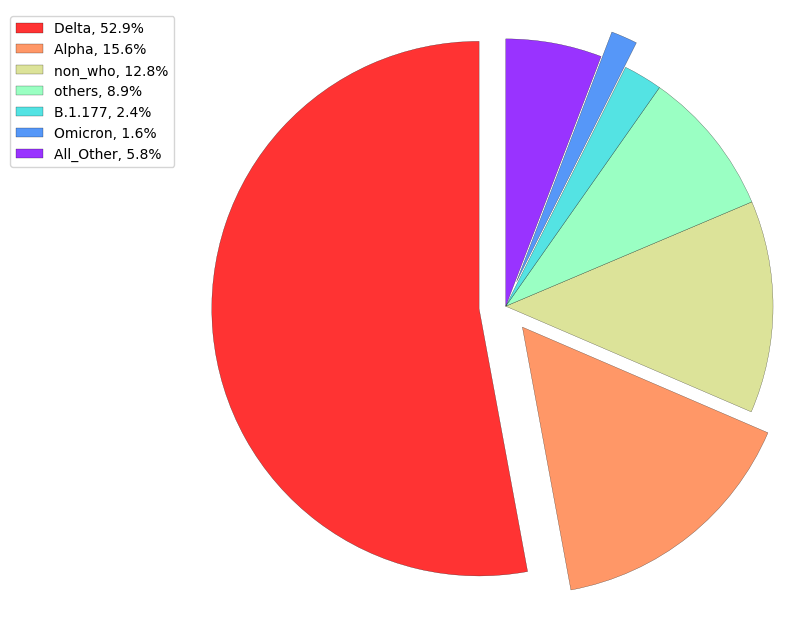

In [8]:
s1 = df.groupby('variant')['num_sequences'].agg('sum').sort_values(ascending = False)
labels = s1.index[:6]
labels = labels.append(pd.Index(['All_Other']))
sizes = s1.values[:6]
sizes = np.append(sizes, np.sum(s1.values[6:]))
explode = tuple(1000 if labels[i] in ['Alpha', 'Delta', 'Omicron'] else 0 for i in range(len(labels)))
colors = cm.rainbow((np.linspace(1, 0, len(labels))))


fig = plt.figure(figsize = (8, 8), dpi = 100)
plt.pie(sizes, explode = explode, radius = 10000, labels = None, shadow = False, startangle = 90, colors = colors, wedgeprops = {'alpha': 0.8, 'edgecolor': 'black', 'linewidth': 0.2, 'linestyle': '-'})
plt.axis('equal') # Circle.

total = sum(sizes)
plt.legend(['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)], bbox_to_anchor=(0.0, 1), loc = 'upper right')

plt.show()

**Observations:**
1. Up to 2022/01/05, the Delta variant has the most cases in the included history (2020/05/11-2022/01/05), which takes up 52.9% of the cases of all variants.
2. The top 3 variants that have far more cases than the others are: Delta, Alpha, non_who in the descending order. They in total take up 81.3% of the cases of all variants.

**Display the total number of cases of all variants for each country.**

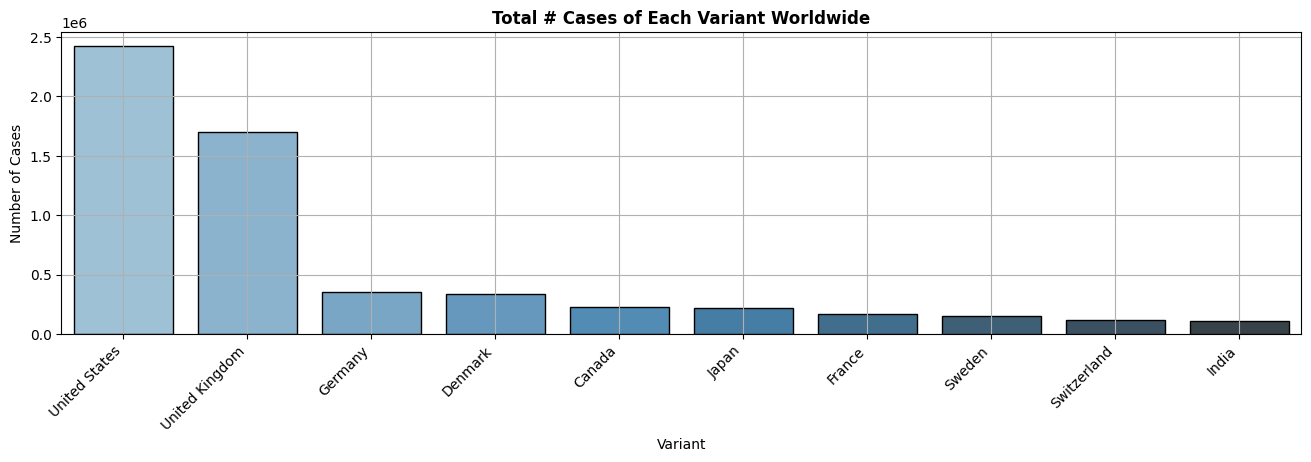

In [9]:
dataframe = df.groupby('location')['num_sequences'].agg('sum').sort_values(ascending = False)[:10]
dataframe = pd.DataFrame({'Variant': dataframe.index, 'Number of Cases': dataframe.values})
fig = plt.figure(figsize = (16,4), dpi = 100)
sns.barplot(x = dataframe['Variant'], y = dataframe["Number of Cases"], edgecolor = 'black', linewidth = 1, palette = "Blues_d")
plt.xticks(rotation=45, ha="right")
plt.title(f'Total # Cases of Each Variant Worldwide', loc = 'center', fontweight = "bold")
plt.grid()
plt.show()

**Observations:**
1. The United States has the most total cases up to now, which is about 2.5 millions.
2. The United Kingdom has the second most cases, which is about 1.7 millions.
3. The cases in the top two countries (United States and United Kingdom) are prominently more than the remaining countries.

**Display the top 10 countries that have the most delta and omicron.**

In [10]:
print(f'Total number of types of variant: {len(df.variant.unique())}')
print(f'Total number of countries included in the dataset: {len(df.location.unique())}')

Total number of types of variant: 24
Total number of countries included in the dataset: 121


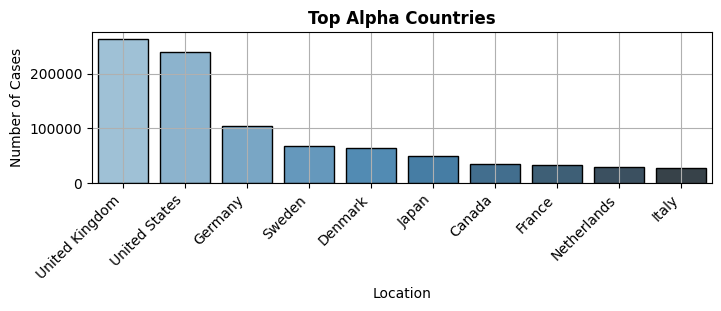

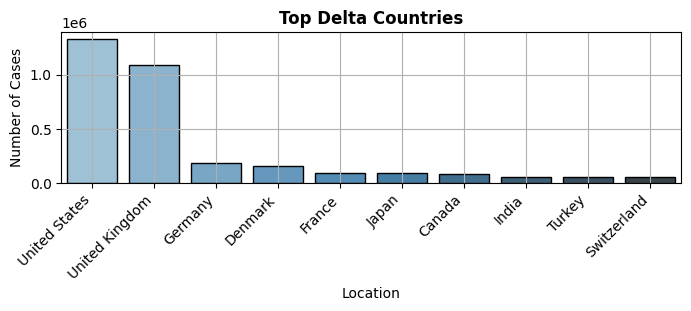

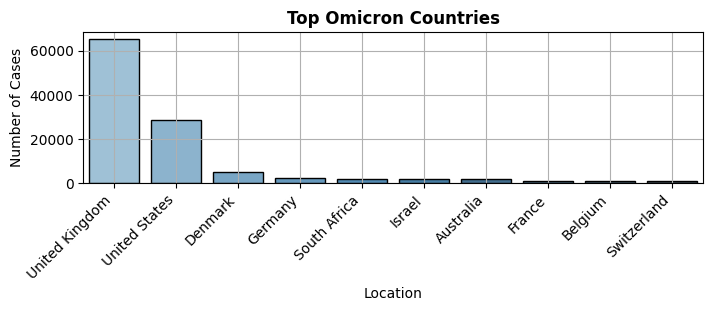

In [11]:
for variant in ['Alpha', 'Delta', 'Omicron']:
    dataframe = df.loc[df['variant'] == variant].groupby('location')['num_sequences'].agg('sum').sort_values(ascending = False)[:10]
    dataframe = pd.DataFrame({'Location':dataframe.index, 'Number of Cases':dataframe.values})
    fig = plt.figure(figsize = (8,2), dpi = 100)
    sns.barplot(x = dataframe['Location'], y = dataframe["Number of Cases"], edgecolor = 'black', linewidth = 1, palette = "Blues_d")
    plt.xticks(rotation = 45, ha = "right")
    plt.title(f'Top {variant} Countries', loc = 'center', fontweight = "bold")
    plt.grid()
    plt.show()

**Observations:**
1. The United Kingdom has the most Alpha and Omicron cases and the United States has the most Delta cases.
2. Having a large number of cases of one specific variant doesn't neccessarily mean also having a large number of cases of other variants. For example, Sweden rank NO.4 in the list of having the most Alpha cases but it is absent in the top 10 list of Delat and Omicron.

**Display how the total cases of all kinds evolve with time.**

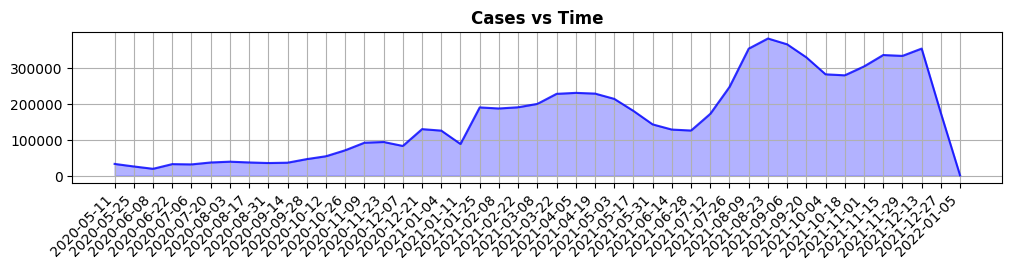

In [12]:
fig = plt.figure(figsize = (12,2), dpi = 100)
dataframe = df.groupby('date')['num_sequences'].agg('sum')
dataframe = pd.DataFrame({'Location':dataframe.index, 'Number of Cases':dataframe.values})
plt.fill_between(dataframe['Location'], dataframe["Number of Cases"], color = 'b', alpha=0.3)
plt.plot(dataframe['Location'], dataframe["Number of Cases"], color = 'b', alpha=0.8)
plt.xticks(rotation=45, ha="right")
plt.title(f'Cases vs Time', loc = 'center', fontweight = "bold")
plt.grid()   
plt.show()

**Observations:**
1. The daily reported cases in the period of 2020/05/11-2020/10/26 is obviously less than those reported after. This is possibly caused by the limited tests conducted in all countries and lower transmission capacity of earlier varients.
2. There are ocillations of the daily reported cases, which may be correlated with the reaction taken by the government of different countries such as lockdown policy and vaccination, etc. (Need more data to draw concrete conclusion)
3. There's a rapid drop from 2021/12.13 to 2022/01/05 (?)

**Display how each individual variant evolve with time.**

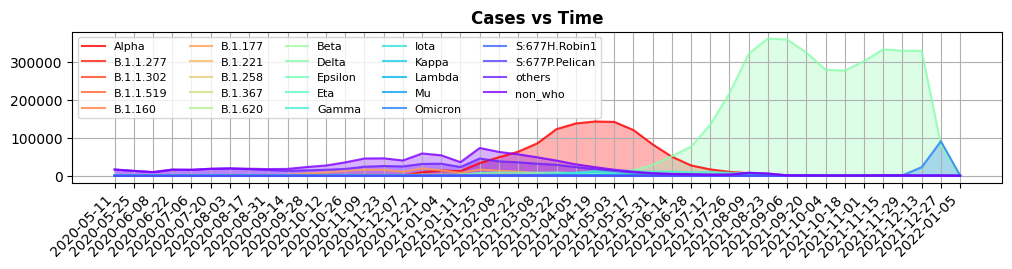

In [13]:
fig = plt.figure(figsize = (12,2), dpi = 100)
virals = df['variant'].unique()
colors = cm.rainbow((np.linspace(1, 0, len(virals))))

for variant, color in zip(virals, colors):
    dataframe = df.loc[df['variant'] == variant].groupby('date')['num_sequences'].agg('sum')
    dataframe = pd.DataFrame({'Location':dataframe.index, 'Number of Cases':dataframe.values})
    plt.fill_between(dataframe['Location'], dataframe["Number of Cases"], color = color, alpha=0.3)
    plt.plot(dataframe['Location'], dataframe["Number of Cases"], color = color, alpha=0.8)

plt.xticks(rotation=45, ha="right")
plt.title(f'Cases vs Time', loc = 'center', fontweight = "bold")
plt.grid()   
plt.legend(virals, ncol = 5, loc = 'upper left', prop={'size': 8})
plt.show()

**Separate Alpha, Delta and Omicron from other variants.**

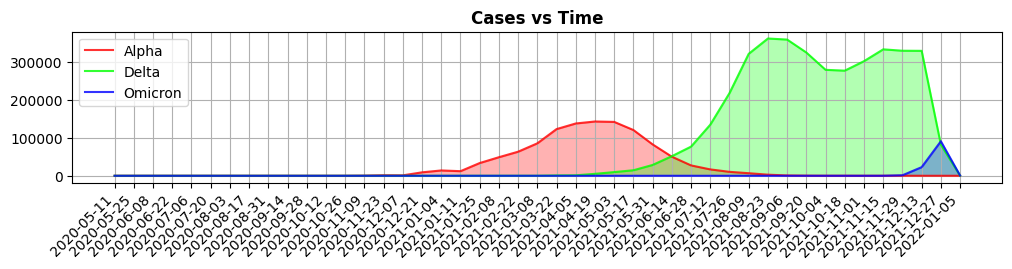

In [14]:
fig = plt.figure(figsize = (12,2), dpi = 100)
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]
virals = ['Alpha', 'Delta', 'Omicron']

for variant, color in zip(virals, colors):
    dataframe = df.loc[df['variant'] == variant].groupby('date')['num_sequences'].agg('sum')
    dataframe = pd.DataFrame({'Location':dataframe.index, 'Number of Cases':dataframe.values})
    plt.fill_between(dataframe['Location'], dataframe["Number of Cases"], color = color, alpha=0.3)
    plt.plot(dataframe['Location'], dataframe["Number of Cases"], color = color, alpha=0.8)

plt.xticks(rotation=45, ha="right")
plt.title(f'Cases vs Time', loc = 'center', fontweight = "bold")
plt.grid()   
plt.legend(virals)
plt.show()

**Observations:**
Among Alpha, Delta and Omicron,
1. The occurence and peak time for Alpha, Delta and Omicron are different with Alpha being the earlist and Omicron being the latest.
2. The Delta variant has the highest peak and the longest duration by far.
3. The ealier variant usually has already died down before the peak time of the later variant.

## Forecasting

**We could build a model to forecast the development of covid cases. We use a neural network composed of a LSTM layer and a dense layer to perform the forecasting.**

In [15]:
from sklearn.preprocessing import MinMaxScaler
import torch 
import torch.nn as nn
from collections import Counter

**Prepare the data.**

Firstly we need to inspect if the dates of data points are evenly separated.

In [16]:
dates = list(pd.to_datetime(df.index.unique().sort_values()))
separations = []
for idx in range(len(dates)-1):
    separations.append(dates[idx + 1] - dates[idx])
print(Counter(separations))

Counter({Timedelta('14 days 00:00:00'): 42, Timedelta('7 days 00:00:00'): 1, Timedelta('9 days 00:00:00'): 1})


The vast majority (42 out of 44) time intervals are 14 days, which is acceptable to conduct a forecasting.

In [17]:
agg_df = pd.DataFrame(df.groupby('date')['num_sequences'].agg('sum'))
scaler = MinMaxScaler()
agg_df[['num_sequences']] = scaler.fit_transform(agg_df[['num_sequences']])
print('Total # of data points: ', len(agg_df))

Total # of data points:  45


There are 45 data points in the time series. We use 36 points as the training data and 9 points as the test data.

In [18]:
test_split = 0.2
test_size = round(len(agg_df) * test_split)

train_set = agg_df.iloc[:-test_size]
test_set = agg_df.iloc[-test_size:]

print(len(train_set), len(test_set))

36 9


Here we plot the train and test data in the same graph.

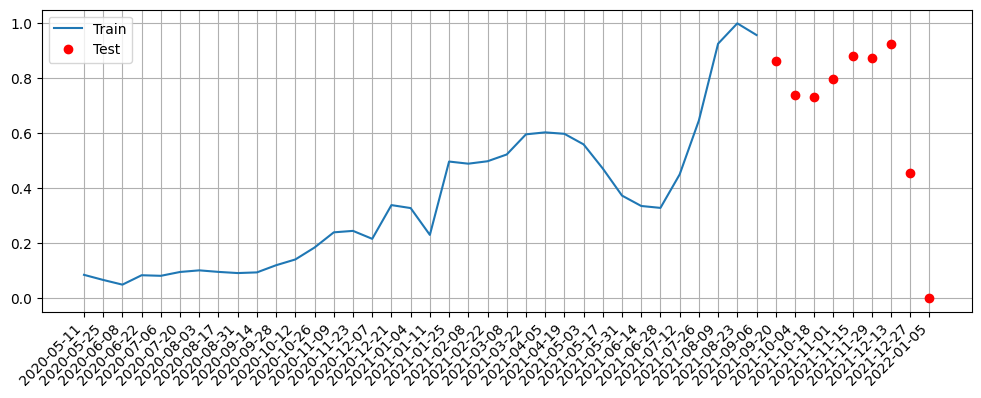

In [19]:
plt.figure(figsize = (12, 4), dpi = 100)
plt.plot(train_set.index, train_set['num_sequences'], label = 'Train')
plt.plot(test_set.index, test_set['num_sequences'], 'ro', label = 'Test')
plt.grid()
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

We write a function to generate inputs and outputs from the time series data for the neural net.

In [20]:
def input_data(seq, ws):
    output = []   
    L = len(seq)
    print(f"length of input training dat: {format(L)}")
    inputs = []
    outputs = []
    for i in range(L - ws):
        window = seq[i:i + ws].values.reshape(-1, 1).tolist()
        label = seq[i + ws:i + ws + 1].values.item()
        inputs.append(window)
        outputs.append(label)
    return inputs, outputs

We choose ```window_size = 10``` meaning that we predict the next data point by using the information of 10 data points prior to it.

In [21]:
window_size = 10
train_inputs, train_outputs = input_data(train_set, window_size)
train_inputs = torch.tensor(train_inputs)
train_outputs = torch.tensor(train_outputs)
print(train_inputs[0], train_outputs[0])

length of input training dat: 36
tensor([[0.0840],
        [0.0654],
        [0.0483],
        [0.0826],
        [0.0805],
        [0.0945],
        [0.1004],
        [0.0947],
        [0.0905],
        [0.0929]]) tensor(0.1191)


**Build the model.**

In [35]:
class LongShortTM(nn.Module):
    def __init__(self, input_size = 1, hidden_size = 64, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first = True)
        self.linear = nn.Linear(hidden_size, out_size)
        self.dropout = nn.Dropout(0.3)

    def forward(self, seq):        
        _, (lstm_out, _) = self.lstm(seq)
        lstm_out = lstm_out.transpose(0, 1)
        lstm_out = self.dropout(lstm_out)
        pred = self.linear(lstm_out)  
        return pred

In [64]:
model = LongShortTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
print(model)

LongShortTM(
  (lstm): LSTM(1, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


**Train the model.**

In [65]:
epochs = 200
future = 9

train_loss_history = []
test_loss_history = []

es = True
count = 0
patience = 100
best_val_loss = 100

for i in range(epochs):
    
    optimizer.zero_grad()
    
    y_pred = model(train_inputs)

    loss = criterion(y_pred.squeeze(), train_outputs)
    
    loss.backward()
    
    optimizer.step()

    if i%100==0:
        print(f"Epoch {i} Loss {loss} ")
        
    train_loss_history.append([i, loss.item()])

    # Take the last 'window_size' elements of train_set
    preds = np.array(train_set[-window_size:]).reshape(-1).tolist()
    
    # Then predict the next 'future' elements consecutively
    for f in range(future):
        
        seq = torch.tensor(preds[-window_size:]).view(1, -1, 1)
        
        with torch.no_grad():
            
            preds.append(model(seq).item())
    
    # Evaluate a loss value based on the prediction and the ground truth for the test set
    loss = criterion(torch.tensor(preds[-test_size:]), torch.tensor(np.array(test_set)).view(-1))
    
    if i%100==0:
        print(f'Performance on test range: {loss}')
        
    test_loss_history.append([i, loss])
       
    if es:
        if loss > best_val_loss:
            count += 1
        else:
            best_val_loss = loss
            count = 0
        if count >= patience:
            break
    

Epoch 0 Loss 0.20224381983280182 
Performance on test range: 0.4453969846074613
Epoch 100 Loss 0.03299938142299652 
Performance on test range: 0.21556229601583501


Display the training history and the predicted result.

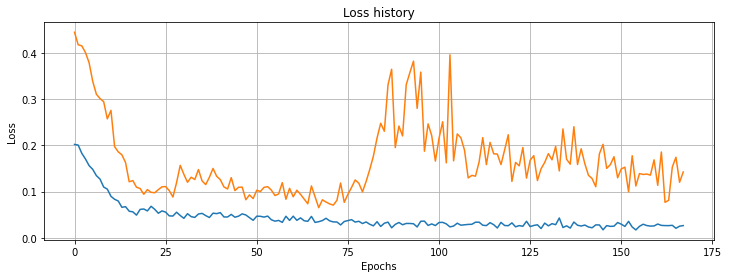

In [66]:
train_loss_history = np.array(train_loss_history)
test_loss_history = np.array(test_loss_history)

plt.figure(figsize=(12,4))
plt.grid(True)
plt.plot(train_loss_history[:, 0], train_loss_history[:, 1], label = 'Train')
plt.plot(test_loss_history[:, 0], test_loss_history[:, 1], label = 'Test')
plt.title('Loss history')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

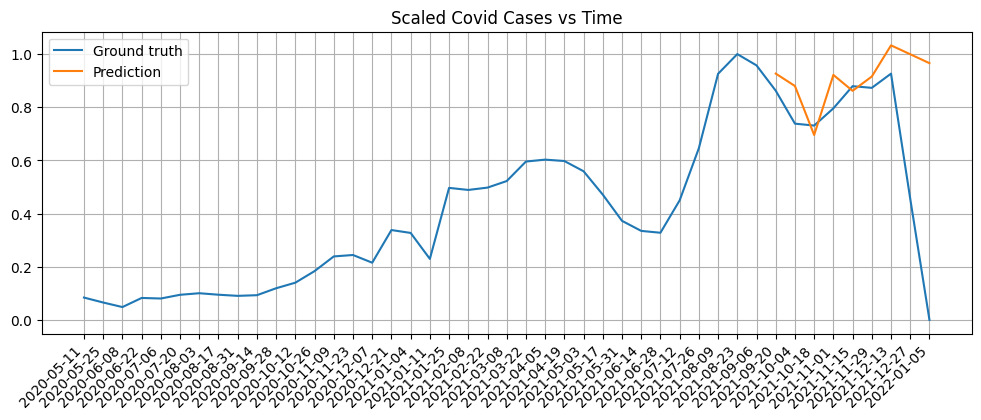

In [67]:
plt.figure(figsize=(12,4), dpi = 100)
plt.grid(True)
plt.plot(agg_df, label = 'Ground truth')
plt.plot(test_set.index, preds[window_size:], label = 'Prediction')
plt.xticks(rotation=45, ha="right")
plt.legend(loc = 'upper left')
plt.title('Scaled Covid Cases vs Time')
plt.show()

**Remark**

We can see that even though we have very limited amount of data, the model can still predict the local zigzag behavior of the series and the overall increasing trend up to 2021/12/13. However, it failed to predict the abrupt drop from 2021/12/13 to 2022/01/05.

To train a more complex model and get more accurate and reliable forecasting, more data is required.